# Chapter 13: Measuring Text Similarities

## 13.1 Simple Text Comparison

In [1]:
# Assigning texts to variables
text1 = 'She sells seashells by the seashore.'
text2 = '"Seashells! The seashells are on sale! By the seashore."'
text3 = 'She sells 3 seashells to John, who lives by the lake.'

In [2]:
# Tokenization: Splitting text into individual words
# Splitting text into words
words_lists = [text.split() for text in [text1, text2, text3]]
words1, words2, words3 = words_lists

for i, words in enumerate(words_lists, 1):
    print(f"Words in text {i}")
    print(f"{words}\n")

Words in text 1
['She', 'sells', 'seashells', 'by', 'the', 'seashore.']

Words in text 2
['"Seashells!', 'The', 'seashells', 'are', 'on', 'sale!', 'By', 'the', 'seashore."']

Words in text 3
['She', 'sells', '3', 'seashells', 'to', 'John,', 'who', 'lives', 'by', 'the', 'lake.']



In [3]:
# Removing case sensitivity and punctuation
def simplify_text(text):
    for punctuation in ['.', ',', '!', '?', '"']:
        text = text.replace(punctuation, '')
        
    return text.lower()

for i, words in enumerate(words_lists, 1):
    for j, word in enumerate(words):
        words[j] = simplify_text(word)
    
    print(f"Words in text {i}")
    print(f"{words}\n")

Words in text 1
['she', 'sells', 'seashells', 'by', 'the', 'seashore']

Words in text 2
['seashells', 'the', 'seashells', 'are', 'on', 'sale', 'by', 'the', 'seashore']

Words in text 3
['she', 'sells', '3', 'seashells', 'to', 'john', 'who', 'lives', 'by', 'the', 'lake']



In [4]:
# Converting word lists to sets (to take out duplicates)
words_sets = [set(words) for words in words_lists]
for i, unique_words in enumerate(words_sets, 1):
    print(f"Unique Words in text {i}")
    print(f"{unique_words}\n")

Unique Words in text 1
{'the', 'seashells', 'by', 'she', 'sells', 'seashore'}

Unique Words in text 2
{'the', 'seashells', 'sale', 'by', 'are', 'seashore', 'on'}

Unique Words in text 3
{'lake', 'the', 'lives', 'to', 'who', 'john', 'seashells', 'by', 'she', 'sells', '3'}



In [5]:
# Extracting overlapping words between two texts
words_set1 = words_sets[0]
for i, words_set in enumerate(words_sets[1:], 2):
    shared_words = words_set1 & words_set
    print(f"Texts 1 and {i} share these {len(shared_words)} words:")
    print(f"{shared_words}\n")

Texts 1 and 2 share these 4 words:
{'seashells', 'the', 'by', 'seashore'}

Texts 1 and 3 share these 5 words:
{'the', 'seashells', 'by', 'she', 'sells'}



In [6]:
# Extracting diverging words between two texts
for i, words_set in enumerate(words_sets[1:], 2):
    diverging_words = words_set1 ^ words_set
    print(f"Texts 1 and {i} don't share these {len(diverging_words)} words:")
    print(f"{diverging_words}\n")

Texts 1 and 2 don't share these 5 words:
{'are', 'sale', 'she', 'sells', 'on'}

Texts 1 and 3 don't share these 7 words:
{'lake', 'lives', 'to', 'who', 'john', 'seashore', '3'}



In [7]:
for i, words_set in enumerate(words_sets[1:], 2):
    total_words = words_set1 | words_set
    print(f"Together, texts 1 and {i} contain {len(total_words)} "
          f"unique words. These words are:\n {total_words}\n")
    

Together, texts 1 and 2 contain 9 unique words. These words are:
 {'are', 'the', 'seashells', 'sale', 'by', 'she', 'sells', 'seashore', 'on'}

Together, texts 1 and 3 contain 12 unique words. These words are:
 {'lake', 'lives', 'john', 'seashells', 'by', 'she', '3', 'seashore', 'the', 'to', 'who', 'sells'}



In [8]:
# Extracting the percentage of shared words between two texts
for i, words_set in enumerate(words_sets[1:], 2):
    shared_words = words_set1 & words_set
    diverging_words = words_set1 ^ words_set
    total_words = words_set1 | words_set
    assert len(total_words) == len(shared_words) + len(diverging_words)
    percent_shared = 100 * len(shared_words) / len(total_words)
    percent_diverging = 100 * len(diverging_words) / len(total_words)
    
    print(f"Together, texts 1 and {i} contain {len(total_words)} "
          f"unique words. \n{percent_shared:.2f}% of these words are "
          f"shared. \n{percent_diverging:.2f}% of these words diverge.\n")
# What was developed here is the Jaccard similarity or Jaccard index

Together, texts 1 and 2 contain 9 unique words. 
44.44% of these words are shared. 
55.56% of these words diverge.

Together, texts 1 and 3 contain 12 unique words. 
41.67% of these words are shared. 
58.33% of these words diverge.



### 13.1.1 Exploring the Jaccard similarity

In [9]:
# Computing the Jaccard similarity
def jaccard_similarity(text_a, text_b):
    word_set_a, word_set_b = [set(simplify_text(text).split()) for text in [text_a, text_b]]
    num_shared = len(word_set_a & word_set_b)
    num_total = len(word_set_a | word_set_b)
    return num_shared / num_total

for text in [text2, text3]:
    similarity = jaccard_similarity(text1, text)
    print(f"The Jaccard similarity between '{text1}' and '{text}' "
          f"equals {similarity:.4f}." "\n")
# Not very efficient

The Jaccard similarity between 'She sells seashells by the seashore.' and '"Seashells! The seashells are on sale! By the seashore."' equals 0.4444.

The Jaccard similarity between 'She sells seashells by the seashore.' and 'She sells 3 seashells to John, who lives by the lake.' equals 0.4167.



In [10]:
# Efficiently computing the Jaccard similarity
def jaccard_similarity_efficient(text_a, text_b):
    word_set_a, word_set_b = [set(simplify_text(text).split()) for text in [text_a, text_b]]
    num_shared = len(word_set_a & word_set_b)
    num_total = len(word_set_a) + len(word_set_b) - num_shared
    return num_shared / num_total

for text in [text2, text3]:
    similarity = jaccard_similarity_efficient(text1, text)
    assert similarity == jaccard_similarity(text1, text)

### 13.1.2 Replacing words with numeric values

In [11]:
# Vocabulary: Dictionary of words with numbers representing their count in the text
# Assigning words to numbers in a vocabulary
words_set1, words_set2, words_set3 = words_sets
total_words = words_set1 | words_set2 | words_set3
vocabulary = {word : i for i, word in enumerate(total_words)}
value_to_word = {value : word for word, value in vocabulary.items()}
print(f"Our vocabulary conatains {len(vocabulary)} words. "
      f"This vocabulary is:\n{vocabulary}")

Our vocabulary conatains 15 words. This vocabulary is:
{'lake': 0, 'lives': 1, 'john': 2, 'seashells': 3, 'by': 4, 'are': 5, 'she': 6, 'seashore': 7, 'on': 8, '3': 9, 'the': 10, 'to': 11, 'who': 12, 'sale': 13, 'sells': 14}


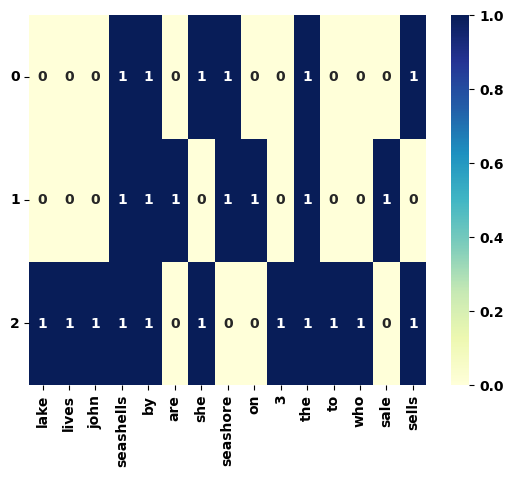

In [12]:
# Text Vectorization: Making text into a 1D array of numbers
# Transforming words into binary vectors
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

vectors = []
for i, words_set in enumerate(words_sets, 1):
    vector = np.array([0] * len(vocabulary))
    # np.zeros(len(vocabulary)) # same as line above
    for word in words_set:
        vector[vocabulary[word]] = 1
    vectors.append(vector)
        
sns.heatmap(vectors, annot=True, cmap='YlGnBu', xticklabels=vocabulary.keys())
yticklabels=['Text 1', 'Text 2', 'Text 3']
plt.yticks(rotation=0)
plt.show()

In [13]:
# Finding shared words using vector arithmetic
vector1, vector2 = vectors[:2]
for i in range(len(vocabulary)):
    if vector1[i] * vector2[i]:
        shared_word = value_to_word[i]
        print(f"'{shared_word}' is present in both texts 1 and 2")

'seashells' is present in both texts 1 and 2
'by' is present in both texts 1 and 2
'seashore' is present in both texts 1 and 2
'the' is present in both texts 1 and 2


In [14]:
# Counting shared words using vector arithmetic
shared_word_count = sum(vector1[i] * vector2[i] for i in range(len(vocabulary)))
assert shared_word_count == len(words_set1 & words_set2)
# Dot Product: Sum of Pairwise products across all vector indices

In [15]:
# Computing a vector dot product using NumPy
assert vector1.dot(vector2) == shared_word_count
assert vector1 @ vector2 == shared_word_count

In [16]:
# Counting total words using vector arithmetic
assert vector1 @ vector1 == len(words_set1)
assert vector2 @ vector2 == len(words_set2)

In [17]:
# Tanimoto Similarity: Vectorized implementation of Jaccard similarity
# Computing text similarity using vector arithmetic
def tanimoto_similarity(vector_a, vector_b):
    num_shared = vector_a @ vector_b
    num_total = vector_a @ vector_a + vector_b @ vector_b - num_shared
    return num_shared / num_total

for i, text in enumerate([text2, text3], 1):
    similarity = tanimoto_similarity(vector1, vectors[i])
    assert similarity == jaccard_similarity(text1, text)

In [18]:
# Computing the similarity of non-binary vectors
non_binary_vector1 = np.array([5, 3])
non_binary_vector2 = np.array([5, 2])
similarity = tanimoto_similarity(non_binary_vector1, non_binary_vector2)
print(f"The similarity of 2 non-binary vectors is {similarity}")

The similarity of 2 non-binary vectors is 0.96875


## 13.2 Vectorizing texts using word counts

In [19]:
# Computing TF vector similarity
similarity = tanimoto_similarity(np.array([61,2]), np.array([1,71]))
print(f"The similarity between texts is approximately {similarity:.3f}")

The similarity between texts is approximately 0.024


In [20]:
# Assessing identical vector similarity
assert tanimoto_similarity(np.array([1, 1]), np.array([1, 1])) == 1

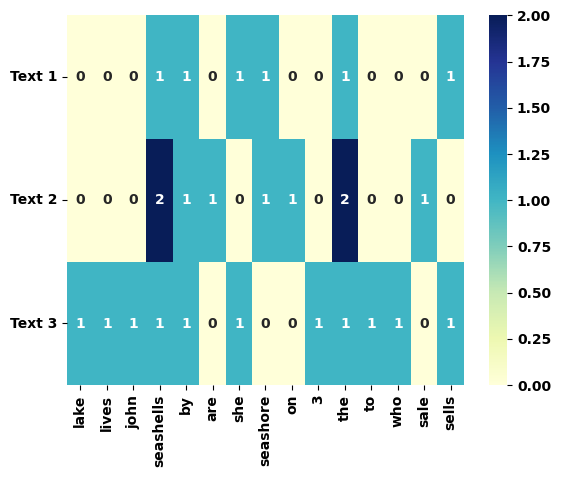

In [21]:
# Computing TF vectors from word lists
tf_vectors = []
for i, words_list in enumerate(words_lists, 1):
    tf_vector = np.array([0] * len(vocabulary))
    for word in words_list:
        word_index = vocabulary[word]
        # Updates the word count using the vocabulary index
        tf_vector[word_index] += 1
        
    tf_vectors.append(tf_vector)
    
sns.heatmap(tf_vectors, cmap='YlGnBu', annot=True, xticklabels=vocabulary.keys(), 
            yticklabels=['Text 1', 'Text 2', 'Text 3'])
plt.yticks(rotation=0)
plt.show()

In [22]:
# Comparing metrics of vector similarity
tf_vector1 = tf_vectors[0]
binary_vector1 = vectors[0]

for i, tf_vector in enumerate(tf_vectors[1:], 2):
    similarity = tanimoto_similarity(tf_vector1, tf_vector)
    old_similarity = tanimoto_similarity(binary_vector1, vectors[i-1])
    print(f"The recomputed Tanimoto similarity between texts 1 and {i} is {similarity:.4f}.")
    print(f"Previously, that similarity equaled {old_similarity:.4f} " "\n")

The recomputed Tanimoto similarity between texts 1 and 2 is 0.4615.
Previously, that similarity equaled 0.4444 

The recomputed Tanimoto similarity between texts 1 and 3 is 0.4167.
Previously, that similarity equaled 0.4167 



### 13.2.1 Using normalization to improve TF vector similarity

In [23]:
# Simple search engine vectorization
query_vector = np.array([1, 1,])
title_a_vector = np.array([3, 3])
title_b_vector = np.array([1, 0])

In [24]:
# Ranking titles by query similarity
titles = ['A: Pepperoni Pizza! Pepperoni Pizza! Pepperoni Pizza!', 'B: Pepperoni']
title_vectors = [title_a_vector, title_b_vector]
similarities = [tanimoto_similarity(query_vector, title_vector) for title_vector in title_vectors]

for index in sorted(range(len(titles)), key=lambda i: similarities[i], reverse=True):
    title = titles[index]
    similarity = similarities[index]
    print(f"'{title}' has a query similarity of {similarity:.4f}")

'B: Pepperoni' has a query similarity of 0.5000
'A: Pepperoni Pizza! Pepperoni Pizza! Pepperoni Pizza!' has a query similarity of 0.4286


In [25]:
# Eliminating size differences through division
assert np.array_equal(query_vector, title_a_vector / 3)
assert tanimoto_similarity(query_vector, title_a_vector / 3) == 1

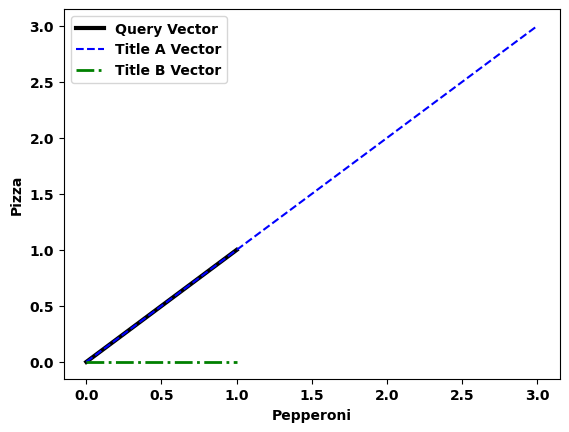

In [26]:
# Plotting TF vectors in 2D space
plt.plot([0, query_vector[0]], [0, query_vector[1]], c='k', linewidth=3, label='Query Vector')
plt.plot([0, title_a_vector[0]], [0, title_a_vector[1]], c='b', linestyle='--', label='Title A Vector')
plt.plot([0, title_b_vector[0]], [0, title_b_vector[1]], c='g', linewidth=2, linestyle='-.', label='Title B Vector')
plt.xlabel('Pepperoni')
plt.ylabel('Pizza')
plt.legend()
plt.show()

In [27]:
# Computing vector magnitude
from scipy.spatial.distance import euclidean
from numpy.linalg import norm

In [28]:
vector_names = ['Query Vector', 'Title A Vector', 'Title B Vector']
tf_search_vectors = [query_vector, title_a_vector, title_b_vector]
origin = np.array([0, 0])
for name, tf_vector in zip(vector_names, tf_search_vectors):
    magnitude = euclidean(tf_vector, origin)
    assert magnitude == norm(tf_vector)
    assert magnitude == (tf_vector @ tf_vector) ** 0.5
    print(f"{name}'s magnitude is approximately {magnitude:.4f}")
    
magnitude_ratio = norm(title_a_vector) / norm(query_vector)
print(f"\nVector A is {magnitude_ratio:.0f}x as long as Query Vector")

Query Vector's magnitude is approximately 1.4142
Title A Vector's magnitude is approximately 4.2426
Title B Vector's magnitude is approximately 1.0000

Vector A is 3x as long as Query Vector


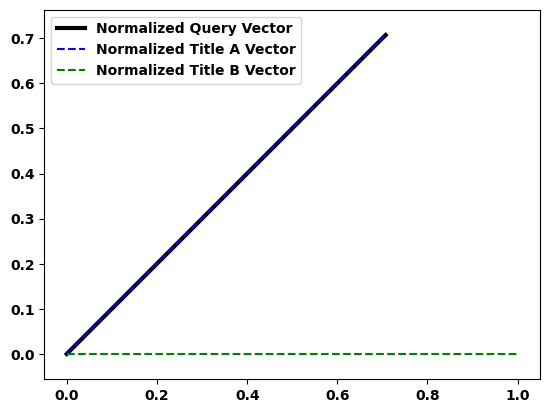

In [29]:
# Normalization: dividing all nums by the magnitude; magnitude is also the L2 norm
# Normalized Vector: v / norm(v)
# Plotting normalized vectors
unit_query_vector = query_vector / norm(query_vector)
unit_title_a_vector = title_a_vector / norm(title_a_vector)
assert np.allclose(unit_query_vector, unit_title_a_vector)
unit_title_b_vector = title_b_vector

plt.plot([0, unit_query_vector[0]], [0, unit_query_vector[1]], c='k', linewidth=3, label='Normalized Query Vector')
plt.plot([0, unit_title_a_vector[0]], [0, unit_title_a_vector[1]], c='b', linestyle='--', label='Normalized Title A Vector')
plt.plot([0, unit_title_b_vector[0]], [0, unit_title_b_vector[1]], c='g', linestyle='--', label='Normalized Title B Vector')

plt.axis('equal')
plt.legend()
plt.show()

In [30]:
# Ranking titles by unit vector similarity
unit_title_vectors = [unit_title_a_vector, unit_title_b_vector]
similarities = [tanimoto_similarity(unit_query_vector, unit_title_vector) for unit_title_vector in unit_title_vectors]

for index in sorted(range(len(titles)), key=lambda i: similarities[i], reverse=True):
    title = titles[index]
    similarity = similarities[index]
    print(f"'{title}' has a normalized query similarity of {similarity:.4f}")

'A: Pepperoni Pizza! Pepperoni Pizza! Pepperoni Pizza!' has a normalized query similarity of 1.0000
'B: Pepperoni' has a normalized query similarity of 0.5469


In [31]:
# Computing a unit vector Tanimoto similarity
def normalized_tanimoto(u1, u2):
    dot_product = u1 @ u2
    return dot_product / (2 - dot_product)

for unit_title_vector in unit_title_vectors[1:]:
    similarity = normalized_tanimoto(unit_query_vector, unit_title_vector)
    assert similarity == tanimoto_similarity(unit_query_vector, unit_title_vector)

### 13.2.2 Using unit vector dot products to convert between relevance metrics

In [32]:
unit_vector_names = ['Normalized Title A Vector', 'Title B Vector']
u1 = unit_query_vector

for unit_vector_name, u2 in zip(unit_vector_names, unit_title_vectors):
    similarity = normalized_tanimoto(u1, u2)
    cosine_similarity = 2 * similarity / (1 + similarity)
    assert cosine_similarity == u1 @ u2
    angle = np.arccos(cosine_similarity)
    euclidean_distance = (2 - 2 * cosine_similarity) ** 0.5
    assert round(euclidean_distance, 10) == round(euclidean(u1, u2), 10)
    measurements = {'Tanimoto similarity': similarity,
                    'cosine similarity': cosine_similarity,
                    'Euclidean distance': euclidean_distance,
                    'angle': np.degrees(angle)}
    
    print(f"We are comparing Normalized Query Vector and {unit_vector_name}")
    for measurement_type, value in measurements.items():
        output = f"The {measurement_type} between vectors is {value:.4f}"
        if measurement_type == 'angle':
            output += ' degrees\n'
            
        print(output)

We are comparing Normalized Query Vector and Normalized Title A Vector
The Tanimoto similarity between vectors is 1.0000
The cosine similarity between vectors is 1.0000
The Euclidean distance between vectors is 0.0000
The angle between vectors is 0.0000 degrees

We are comparing Normalized Query Vector and Title B Vector
The Tanimoto similarity between vectors is 0.5469
The cosine similarity between vectors is 0.7071
The Euclidean distance between vectors is 0.7654
The angle between vectors is 45.0000 degrees



In [33]:
# u1 @ u2 - Cosine of the angle between two unit vectors
# (u1 @ u2) / (2 - u1 @ u2) - Tanimoto similarity between two unit vectors
# (2 - 2 * u1 @ u2) ** 0.5 - Euclidean distance between two unit vectors
# Benefits of Normalization:
    # Elimination of text length as a differentiating signal
    # More efficient Tanimoto similarity computation
    # More efficient computation of the similarity between every pair of vectors

## 13.3 Matrix Multiplication for efficient similarity calculation

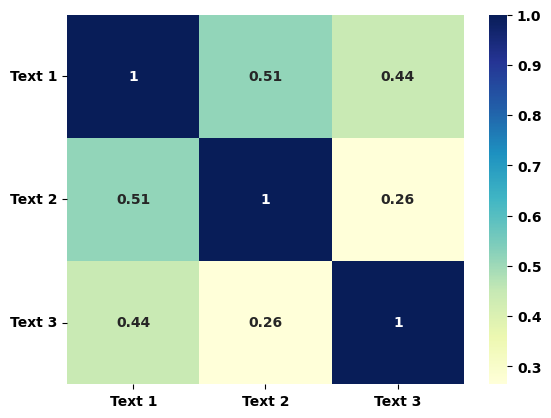

In [34]:
# Computing a table of normalized tanimoto similarities
num_texts = len(tf_vectors)
similarities = np.array([[0.0] * num_texts for _ in range(num_texts)])
unit_vectors = np.array([vector / norm(vector) for vector in tf_vectors])
for i, vector_a in enumerate(unit_vectors):
    for j, vector_b in enumerate(unit_vectors):
        similarities[i][j] = normalized_tanimoto(vector_a, vector_b)
        
labels = ['Text 1', 'Text 2', 'Text 3']
sns.heatmap(similarities, cmap='YlGnBu', annot=True, xticklabels=labels, yticklabels=labels)
plt.yticks(rotation=0)
plt.show()

### 13.3.1 Basic matrix operations

In [35]:
# Computing Pandas and NumPy matrix attributes
import pandas as pd
matrices = [unit_vectors, pd.DataFrame(unit_vectors)]
matrix_types = ['2D NumPy array', 'Pandas DataFrame']

for matrix_type, matrix in zip(matrix_types, matrices):
    row_count, column_count = matrix.shape
    print(f"Our {matrix_type} contains {row_count} rows and {column_count} columns")
    assert (column_count, row_count) == matrix.T.shape

Our 2D NumPy array contains 3 rows and 15 columns
Our Pandas DataFrame contains 3 rows and 15 columns


### NumPy Arithmetic Operations

In [36]:
# NumPy array addition and subtraction
double_similarities = 2 * similarities
np.array_equal(double_similarities, similarities + similarities)
zero_matrix = similarities - similarities
negative_1_matrix = similarities - similarities - 1

for i in range(similarities.shape[0]):
    for j in range(similarities.shape[1]):
        assert double_similarities[i][j] == 2 * similarities[i][j]
        assert zero_matrix[i][j] == 0
        assert negative_1_matrix[i][j] == -1

In [37]:
# NumPy array miltipication and division
squared_similarities = similarities * similarities
assert np.array_equal(squared_similarities, similarities ** 2)
ones_matrix = similarities / similarities

for i in range(similarities.shape[0]):
    for j in range(similarities.shape[1]):
        assert squared_similarities[i][j] == similarities[i][j] ** 2
        assert ones_matrix[i][j] == 1

In [38]:
# Converting between matrix similarity-types
cosine_similarities = 2 * similarities / (1 + similarities)
for i in range(similarities.shape[0]):
    for j in range(similarities.shape[1]):
        cosine_sim = unit_vectors[i] @ unit_vectors[j]
        assert round(cosine_similarities[i][j], 15) == round(cosine_sim, 15)

### NumPy Matrix Row and Column Operations

In [39]:
# Accessing NumPy matrix rows and columns
for name, matrix in [('Similarities', similarities), ('Unit Vector', unit_vectors)]:
    print(f"Accessing rows and columns in the {name} Matrix.")
    row, column = matrix[0], matrix[:,0]
    print(f"Row at index 0 is:\n{row}")
    print(f"\nColumn at index 0 is:\n{column}\n")

Accessing rows and columns in the Similarities Matrix.
Row at index 0 is:
[1.         0.51442439 0.44452044]

Column at index 0 is:
[1.         0.51442439 0.44452044]

Accessing rows and columns in the Unit Vector Matrix.
Row at index 0 is:
[0.         0.         0.         0.40824829 0.40824829 0.
 0.40824829 0.40824829 0.         0.         0.40824829 0.
 0.         0.         0.40824829]

Column at index 0 is:
[0.         0.         0.30151134]



In [40]:
# Computing the dot product between a row and column
row = similarities[0]
column = unit_vectors[:,0]
dot_product = row @ column
print(f"The dot product between the row and column is: {dot_product:.4f}")

The dot product between the row and column is: 0.1340


In [41]:
# Computing dot products between all rows and columns
num_rows = similarities.shape[0]
num_columns = unit_vectors.shape[1]
for i in range(num_rows):
    for j in range(num_columns):
        row = similarities[i]
        column = unit_vectors[:,j]
        dot_product = row @ column
        print(f"The dot product between row {i} and column {j} is: {dot_product:.4f}")

The dot product between row 0 and column 0 is: 0.1340
The dot product between row 0 and column 1 is: 0.1340
The dot product between row 0 and column 2 is: 0.1340
The dot product between row 0 and column 3 is: 0.8276
The dot product between row 0 and column 4 is: 0.6850
The dot product between row 0 and column 5 is: 0.1427
The dot product between row 0 and column 6 is: 0.5423
The dot product between row 0 and column 7 is: 0.5509
The dot product between row 0 and column 8 is: 0.1427
The dot product between row 0 and column 9 is: 0.1340
The dot product between row 0 and column 10 is: 0.8276
The dot product between row 0 and column 11 is: 0.1340
The dot product between row 0 and column 12 is: 0.1340
The dot product between row 0 and column 13 is: 0.1427
The dot product between row 0 and column 14 is: 0.5423
The dot product between row 1 and column 0 is: 0.0797
The dot product between row 1 and column 1 is: 0.0797
The dot product between row 1 and column 2 is: 0.0797
The dot product between

In [42]:
# Storing all-by-all dot products in a matrix
dot_products = np.zeros((num_rows, num_columns))
for i in range(num_rows):
    for j in range(num_columns):
        dot_products[i][j] = similarities[i] @ unit_vectors[:,j]
        
print(dot_products)

[[0.13402795 0.13402795 0.13402795 0.82762755 0.6849519  0.14267565
  0.54227624 0.55092394 0.14267565 0.13402795 0.82762755 0.13402795
  0.13402795 0.14267565 0.54227624]
 [0.07969524 0.07969524 0.07969524 0.84440831 0.56705821 0.2773501
  0.28970812 0.48736297 0.2773501  0.07969524 0.84440831 0.07969524
  0.07969524 0.2773501  0.28970812]
 [0.30151134 0.30151134 0.30151134 0.62960397 0.55629501 0.07330896
  0.48298605 0.25478367 0.07330896 0.30151134 0.62960397 0.30151134
  0.30151134 0.07330896 0.48298605]]


In [43]:
# Computing a matrix product using NumPy
matrix_product = similarities @ unit_vectors
assert np.allclose(matrix_product, dot_products)

In [44]:
# Computing an erronous matrix product
try:
    matrix_product = unit_vectors @ similarities
except:
    print("We can't comput the matrix product")

We can't comput the matrix product


In [45]:
# Running matrix multiplication using matmul
matrix_product = np.matmul(similarities, unit_vectors)
assert np.array_equal(matrix_product, similarities @ unit_vectors)

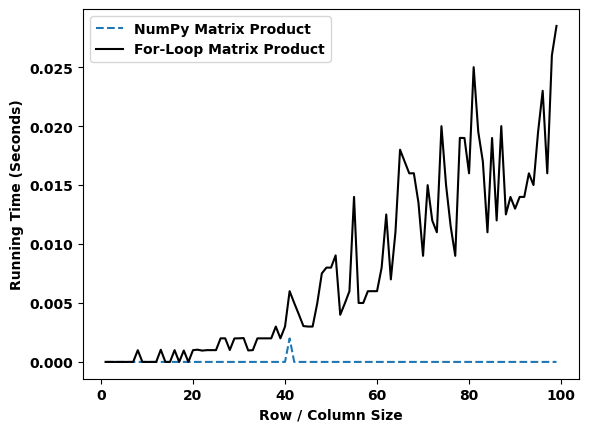

In [46]:
# Comparing matrix product running times
import time

numpy_run_times = []
for_loop_run_times = []

matrix_sizes = range(1, 100)
for size in matrix_sizes:
    matrix = np.ones((size, size))
    
    start_time = time.time()
    matrix @ matrix
    numpy_run_times.append(time.time() - start_time)
    
    start_time = time.time()
    for i in range(size):
        for j in range(size):
            matrix[i] @ matrix[:,j]
            
    for_loop_run_times.append(time.time() - start_time)

plt.plot(matrix_sizes, numpy_run_times, label='NumPy Matrix Product', linestyle='--')
plt.plot(matrix_sizes, for_loop_run_times, label='For-Loop Matrix Product', color='k')
plt.xlabel('Row / Column Size')
plt.ylabel('Running Time (Seconds)')
plt.legend()
plt.show()

### 13.3.2 Computing all-by-all matrix similarities

In [48]:
# Obtaining cosines from a matrix product
cosine_matrix = unit_vectors @ unit_vectors.T
assert np.allclose(cosine_matrix, cosine_similarities)

In [49]:
# Converting cosines to a Tanimoto matrix
tanimoto_matrix = cosine_matrix / (2 - cosine_matrix)
assert np.allclose(tanimoto_matrix, similarities)

In [50]:
# Inputting matrices into normalized_tanimoto
output = normalized_tanimoto(unit_vectors, unit_vectors.T)
assert np.array_equal(output, tanimoto_matrix)

# 13.4 Computational limits of matrix multiplication

In [52]:
# Timing an all-by-all comparison of 30 novels
vocabulary_size = 50000
normalized_vector = [1 / vocabulary_size] * vocabulary_size
book_count = 30

def measure_run_time(book_count):
    book_matrix = np.array([normalized_vector] * book_count)
    start_time = time.time()
    normalized_tanimoto(book_matrix, book_matrix.T)
    return time.time() - start_time

run_time = measure_run_time(book_count)
print(f"It took {run_time:.4f} seconds to compute the similarities across a {book_count}-book by {vocabulary_size}-word matrix")

It took 0.0010 seconds to compute the similarities across a 30-book by 50000-word matrix


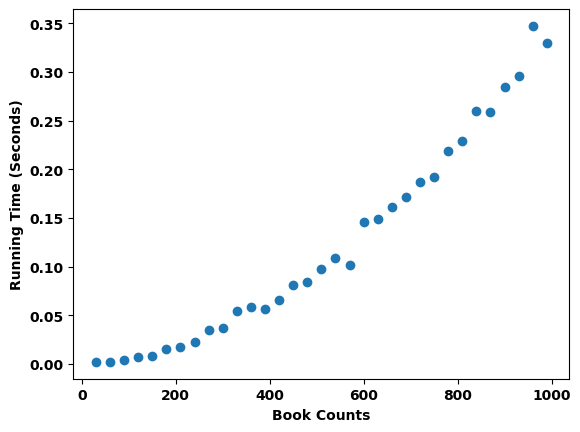

In [53]:
# Plotting book counts vs. running times
book_counts = range (30, 1000, 30)
run_times = [measure_run_time(book_count) for book_count in book_counts]
plt.scatter(book_counts, run_times)
plt.xlabel('Book Counts')
plt.ylabel('Running Time (Seconds)')
plt.show()

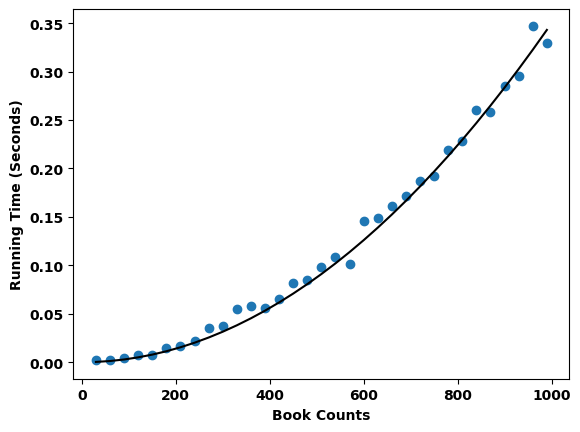

In [55]:
# Modeling running times using a quadratic curve
def y(x): return (0.35 / (1000 ** 2)) * (x ** 2)
plt.scatter(book_counts, run_times)
plt.plot(book_counts, y(np.array(book_counts)), c='k')
plt.xlabel('Book Counts')
plt.ylabel('Running Time (Seconds)')
plt.show()

In [56]:
# Predicting the running time for 300,000 books
book_count = 300000
run_time = y(book_count) / 3600 # <-- convert seconds to hours
print(f"It will take {run_time} hours to compute all-by-all similarities from a {book_count}-book by {vocabulary_size}-word matrix")

It will take 8.75 hours to compute all-by-all similarities from a 300000-book by 50000-word matrix


## Key Words / Notes:
- Jaccard Similarity: Equals the fraction of total unique words that are shared between two texts
- Dot Product: Turn texts into vectors and the outcome will be the words that are shared between two texts
- Tanimoto Simiarity: Generalizes Jaccard to include non-binary vectors
- TF Vectors: Vectors of word counts
- TF Vector Similarity is overly dependent on text size. This can be over come by normalizing the vectors first
- Magnitude: A vector's distance from the origin; divide the vector by this to make a normalized unit vector
- The unit vector similarity can be converted into other common metrics, such as cosine similarity and distance
- Can effieiently comput all-by-all similarities by using matrix multiplication
- If we multiply a normalized matrix by its transpose, we produce a matrix of all-by-all cosine similarities
- Once text size gets too large, we need to reduce its size